# Learning and Decision Making

## Laboratory 2: Markov chains

In the end of the lab, you should submit all code/answers written in the tasks marked as "Activity n. XXX", together with the corresponding outputs and any replies to specific questions posed to the e-mail <adi.tecnico@gmail.com>. Make sure that the subject is of the form [&lt;group n.&gt;] LAB &lt;lab n.&gt;.

### 1. Modeling

Consider once again the simplified Monopoly game described in the Homework and for which you wrote a Markov chain model:

<img src="monopoly.png" width="300px">

Recall that your chain should describe a single player, where: 

* The player rolls a single die in each play; 
* The jail does not prevent the player from continuing to play. In other words, when landing on the “GO TO JAIL” cell, the player jumps back to the “JAIL” cell, but resumes play immediately.

---

#### Activity 1.        

Implement your Markov chain model in Python. In particular,

* Create a list with all the states;
* Define a `numpy` array with the corresponding transition probabilities.

The order for the states used in the transition probability matrix should match that in the list of states. 

**Note 1**: Don't forget to import `numpy`.

**Note 2**: Make sure to print the result in the end.

---

In [15]:
import numpy as np

# 0 = Collect $200
# 1 = Vermont Avenue
# 2 = Jail
# 3 = Virginia Avenue
# 4 = Free Parking
# 5 = Marvin Gardens
# 6 = Go To Jail
# 7 = Pennsylvania Avenue
stateSpace = [0, 1, 2, 3, 4, 5, 6, 7]

stateLabels = ["Go", "VeA", "Ja", "ViA", "FP", "MG", "GoJ", "PA"]

x = 1/6

probsArray = np.array([[0, x, x , x, x, x, x, 0],
               [0, 0, x, x, x, x, x, x],
               [x, 0, 0, x, x, x, x, x],
               [x, x, 0, 0, x, x, x, x],
               [x, x, x, 0, 0, x, x, x],
               [x, x, x, x, 0, 0, x, x],
               [0, 0, 1, 0, 0, 0, 0, 0],
               [x, x, x, x, x, x, 0, 0]])


print("Legenda:\n", "0 = Collect $200\n", "1 = Vermont Avenue\n", "2 = Jail\n", "3 = Virginia Avenue\n",
     "4 = Free Parking\n","5 = Marvin Gardens\n", "6 = Go To Jail\n", "7 = Pennsylvania Avenue\n")
print(stateSpace)
print("\n\n", "Pobabilities Matrix:")
print(probsArray)

Legenda:
 0 = Collect $200
 1 = Vermont Avenue
 2 = Jail
 3 = Virginia Avenue
 4 = Free Parking
 5 = Marvin Gardens
 6 = Go To Jail
 7 = Pennsylvania Avenue

[0, 1, 2, 3, 4, 5, 6, 7]


 Pobabilities Matrix:
[[ 0.          0.16666667  0.16666667  0.16666667  0.16666667  0.16666667
   0.16666667  0.        ]
 [ 0.          0.          0.16666667  0.16666667  0.16666667  0.16666667
   0.16666667  0.16666667]
 [ 0.16666667  0.          0.          0.16666667  0.16666667  0.16666667
   0.16666667  0.16666667]
 [ 0.16666667  0.16666667  0.          0.          0.16666667  0.16666667
   0.16666667  0.16666667]
 [ 0.16666667  0.16666667  0.16666667  0.          0.          0.16666667
   0.16666667  0.16666667]
 [ 0.16666667  0.16666667  0.16666667  0.16666667  0.          0.
   0.16666667  0.16666667]
 [ 0.          0.          1.          0.          0.          0.          0.
   0.        ]
 [ 0.16666667  0.16666667  0.16666667  0.16666667  0.16666667  0.16666667
   0.          0.        ]]


---

#### Activity 2.

Compute the probability of the following trajectories:

* "COLLECT \$200" - "VERMONT AVENUE" - "GO TO JAIL" - "JAIL"
* "COLLECT \$200" - "GO TO JAIL" - "JAIL" - "COLLECT \$200"
* "COLLECT \$200" - "PENNSYLVANIA AVENUE" - "COLLECT \$200"

**Note:** Make sure to print the result in the end.

---

In [16]:
# "COLLECT $200" - "VERMONT AVENUE" - "GO TO JAIL" - "JAIL"
# Probs = (0,1), (1,6), (6,2)

trajectoryProb1 = probsArray[0, 1] * probsArray[1, 6] * probsArray[6, 2]

print("Probability of the trajectory \"COLLECT $200\" - \"VERMONT AVENUE\" - \"GO TO JAIL\" - \"JAIL\" : \n", 
      probsArray[0, 1], "*", probsArray[1, 6], "*", "*", probsArray[6, 2], "=", trajectoryProb1)
print("\n")


# "COLLECT $200" - "GO TO JAIL" - "JAIL" - "COLLECT $200"
# Probs = (0, 6), (6, 2), (2, 0)
trajectoryProb2 = probsArray[0, 6] * probsArray[6, 2] * probsArray[2, 0]

print("Probability of the trajectory \"COLLECT $200\" - \"GO TO JAIL\" - \"JAIL\" - \"COLLECT $200\": \n", 
      probsArray[0, 6], "*", probsArray[6, 2], "*", probsArray[2, 0], "=", trajectoryProb2)
print("\n")


# "COLLECT $200" - "PENNSYLVANIA AVENUE" - "COLLECT $200"
# Probs = (0, 7), (7, 0)
trajectoryProbability3 = probsArray[0, 7] * probsArray[7, 0]

print("Probability of the trajectory \"COLLECT $200\" - \"PENNSYLVANIA AVENUE\" - \"COLLECT $200\": \n", 
      probsArray[0,7], "*", probsArray[7, 0], "=", trajectoryProbability3)

Probability of the trajectory "COLLECT $200" - "VERMONT AVENUE" - "GO TO JAIL" - "JAIL" : 
 0.166666666667 * 0.166666666667 * * 1.0 = 0.0277777777778


Probability of the trajectory "COLLECT $200" - "GO TO JAIL" - "JAIL" - "COLLECT $200": 
 0.166666666667 * 1.0 * 0.166666666667 = 0.0277777777778


Probability of the trajectory "COLLECT $200" - "PENNSYLVANIA AVENUE" - "COLLECT $200": 
 0.0 * 0.166666666667 = 0.0


### 2. Stability

---

#### Activity 3.

Justify whether the chain implemented in Activity #1 is:

* Irreducible
* Aperiodic
* Ergodic

---

**Irreducible:**
The chain is irreducible because from any given state you can find a trajectory that reaches any other possible state (only one communicating class). Also, there is only one communicating class, therefore, all states are communicating. And a Markov Chain is Irreducible if, for any given states **x**, **y** ∈ *X*, x and y are communicating (x <-> y).

**Aperiodic:**
Definition: The chain is aperiodic if from any given state, *X*, the greatest common divider of the time steps of any trajectory that comes back to *X* is 1.

Definition: If a Markov Chain, *M* = (*X* , **P** ) is an irreducible chain (which is the case) and there is **x** ∈ *X* such that **x** is aperiodic, then *M* is aperiodic.

If in t=0 we are in the state "Pennsylvania Avenue", because of the nature of the board and of the die (6 sided, with equal probability) we can say that it's impossible to make a rule that says when "Pennsylvania Avenue" will again be reached, that moment can happen in t=2, t=3, t=4, ... . Therefore, we can conclude that the greatest common divider is 1 (period). With this, we can say that the state is aperiodic, so the MC is also aperiodic.

**Ergodic:** 
Definition: An irreducible and aperiodic Markov Chain has a stationary distribution.

Definition: An ergodic Markov Chain eventually reaches the stationary distribution.

The chain is ergodic because it is irreducible and aperiodic.


---

#### Activity 4

Compute the stationary distribution for the chain.

**Note:** The stationary distribution is a *left* eigenvector of the transition probability matrix associated to the eigenvalue 1. As such, you may find useful the numpy function `numpy.linalg.eig`. Also, recall that the stationary distribution is *a distribution*.

---

[ 0.11131135  0.09350154  0.21817025  0.10940316  0.1068589   0.12466872
  0.12731899  0.10876709]


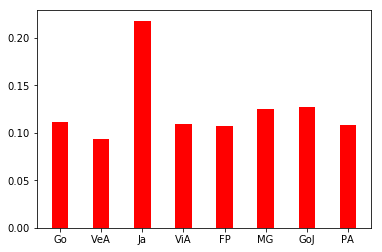

In [17]:
import matplotlib.pyplot as plt

eVal, eVec = np.linalg.eig(probsArray.T)

#getting the index of the eigenvalue 1
eVal1 = (np.abs(eVal - 1)).argmin()

#associated column
statDist = np.array(eVec[:,eVal1])
statDist = statDist.real

#the sum should be one, so we normalize
statDist = statDist/np.sum(statDist)

print(statDist)

#plot
plotWidth = 0.4
plt.bar(np.arange(8), statDist, width = plotWidth, color = 'r')
plt.xticks(np.arange(8), stateLabels)

plt.show()

### 3. Simulation

You are now going to *simulate* the Markov chain that you defined in Question #1.

---

#### Activity 5

Generate a 10,000-step long trajectory of the chain defined in Activity #1. 

---

In [22]:
import numpy.random as rnd
longTraject = [0]

for i in range(10000):
    x_new = rnd.choice(stateSpace, p=probsArray[longTraject[i], :])
    longTraject += [x_new]

print(longTraject)

[0, 4, 6, 2, 3, 6, 2, 0, 6, 2, 7, 0, 2, 0, 6, 2, 5, 2, 6, 2, 5, 2, 6, 2, 7, 3, 6, 2, 5, 0, 4, 0, 6, 2, 4, 1, 4, 7, 4, 0, 6, 2, 6, 2, 5, 0, 1, 5, 1, 5, 6, 2, 6, 2, 7, 0, 6, 2, 0, 4, 2, 3, 4, 6, 2, 5, 1, 5, 7, 5, 2, 5, 0, 6, 2, 3, 0, 4, 6, 2, 5, 7, 4, 5, 1, 7, 2, 3, 0, 1, 3, 1, 7, 1, 4, 1, 5, 1, 2, 7, 1, 7, 2, 7, 0, 2, 3, 6, 2, 7, 2, 6, 2, 6, 2, 7, 1, 4, 6, 2, 0, 5, 7, 5, 6, 2, 4, 0, 2, 5, 3, 1, 4, 6, 2, 0, 2, 0, 6, 2, 6, 2, 4, 0, 5, 3, 6, 2, 7, 4, 6, 2, 6, 2, 6, 2, 3, 4, 1, 6, 2, 6, 2, 3, 7, 1, 7, 5, 3, 0, 6, 2, 6, 2, 3, 1, 5, 3, 7, 3, 1, 2, 5, 6, 2, 6, 2, 5, 2, 3, 0, 4, 5, 2, 0, 4, 6, 2, 4, 1, 6, 2, 4, 2, 0, 3, 7, 1, 6, 2, 7, 3, 0, 6, 2, 0, 2, 6, 2, 5, 2, 4, 6, 2, 0, 4, 7, 1, 3, 5, 7, 1, 6, 2, 6, 2, 0, 1, 4, 7, 0, 4, 0, 3, 1, 4, 2, 4, 5, 1, 7, 0, 4, 0, 1, 6, 2, 0, 2, 4, 1, 5, 1, 7, 0, 2, 6, 2, 7, 0, 3, 7, 0, 2, 4, 1, 3, 4, 6, 2, 3, 7, 2, 3, 4, 1, 3, 0, 3, 5, 1, 5, 3, 6, 2, 5, 7, 0, 3, 0, 6, 2, 5, 7, 2, 4, 2, 5, 0, 5, 0, 2, 5, 0, 5, 6, 2, 0, 3, 0, 6, 2, 5, 1, 5, 1, 7, 0, 6, 2, 7, 0, 6, 

---

#### Activity 6

Draw a histogram of the trajectory generated in Activity #5. Make sure that the histogram has one bin for each state. Compare the relative frequencies with the result of Activity #4.

**Note**: Don't forget to load `matplotlib`.

---

Trajectory Distribution:  [ 0.11027779  0.0947581   0.21889562  0.10967781  0.10577788  0.12703746
  0.12545749  0.10811784]


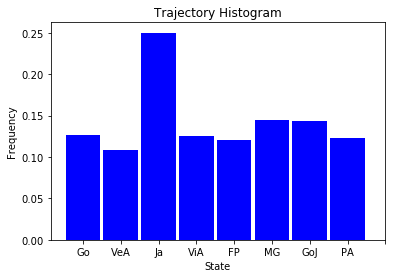

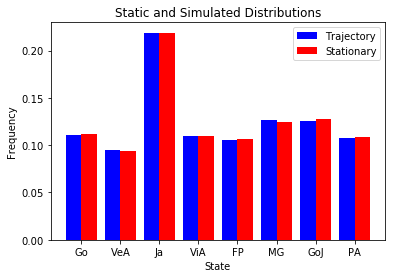

In [21]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

histWidth = 0.8
n, bins, patches = plt.hist(longTraject, bins=8, normed = True, width = histWidth, color = 'b')

n = n/np.sum(n)
print ("Trajectory Distribution: ", n)

#showing histogram
plt.title("Trajectory Histogram")
plt.ylabel("Frequency")
plt.xlabel("State")
plt.xticks(bins + histWidth/2, stateLabels)

plt.show()

print("\n")

#comparing both distributions
fig, ax = plt.subplots()
traj = ax.bar(np.arange(8), n, width = plotWidth, color = 'b')
dist = ax.bar(np.arange(8) + plotWidth, statDist, width = plotWidth, color = 'r')

plt.title("Static and Simulated Distributions")
plt.ylabel("Frequency")
plt.xlabel("State")
plt.xticks(np.arange(8) + plotWidth/2, stateLabels)

plt.legend((traj[0], dist[0]), ('Trajectory', 'Stationary'))
plt.show()

